In [3]:
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt
import IPython

446472


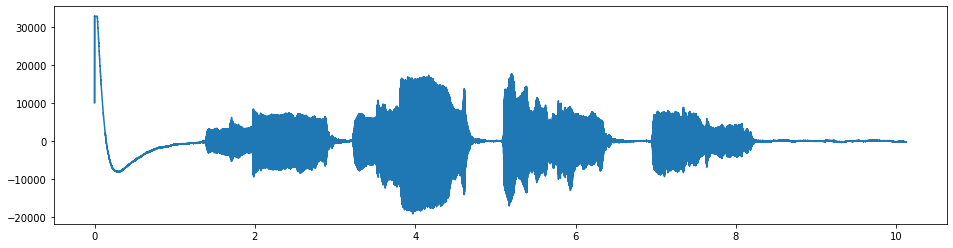

In [93]:
sample_rate, signal = read('morrowind2.wav')
plt.rcParams["figure.figsize"] = (16,4)
plt.plot(np.linspace(0, len(signal) / sample_rate, num=len(signal)), signal)
print(len(signal))
IPython.display.Audio(signal, rate=sample_rate)

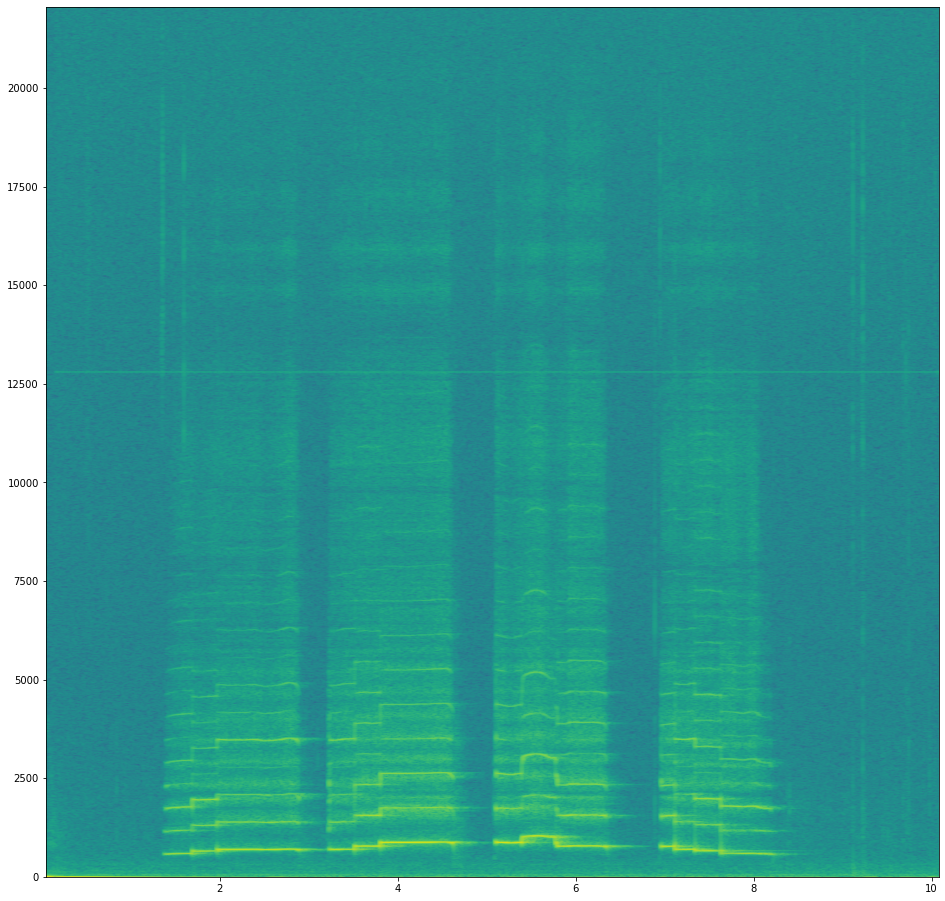

In [102]:
win_size = 1024 * 4
step_size = 64
plt.rcParams["figure.figsize"] = (16,16)

plt.specgram(signal, Fs=sample_rate, NFFT=win_size, noverlap=win_size-step_size);

In [103]:
spectrogram = abs(np.array([
    np.fft.fft(signal[n:n+win_size])
    for n in range(0, len(signal) - win_size, step_size)
])).transpose()[:win_size//2]

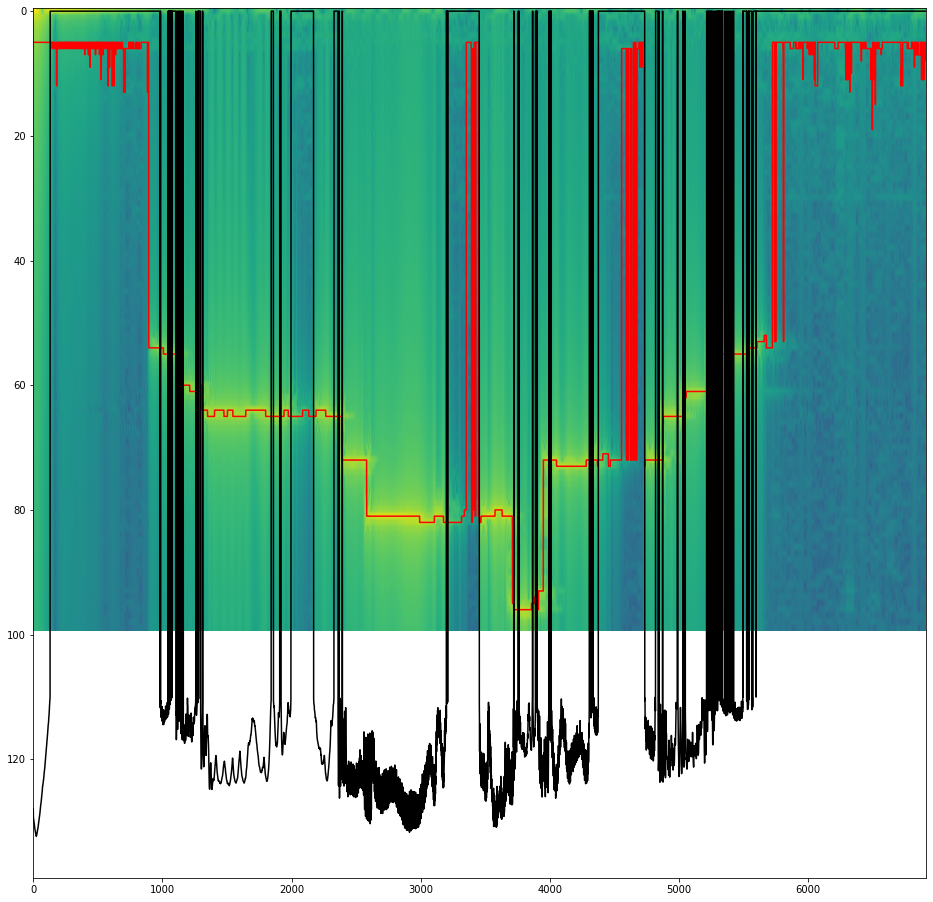

In [111]:
selected = np.clip(np.log(spectrogram), 0, 100)[:100]
plt.imshow(selected, interpolation=None, aspect='auto');
pitch = np.argmax(selected[5:], 0)+5
plt.plot(pitch, color='red');
volume = np.linalg.norm(selected, axis=0)
volume = volume * (volume > 110)
plt.plot(volume, color='black');

In [89]:
import math
y = np.array([
    math.cos(2 * np.pi / win_size * x * pitch[x//step_size]) * (volume[x//step_size] > 1)
    for x in range(len(pitch) * step_size)
])

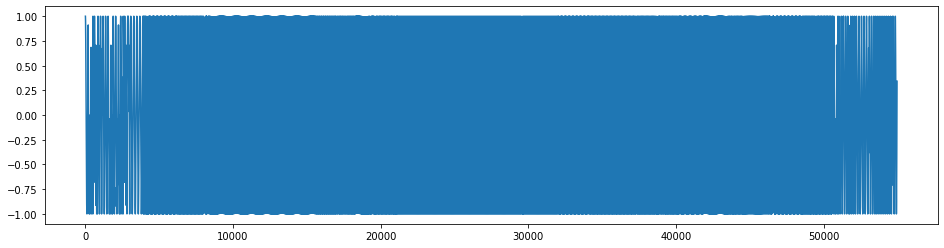

In [90]:
plt.plot(y);

In [69]:
IPython.display.Audio(y, rate=sample_rate)

In [91]:
pitch * (volume > 1) * sample_rate / win_size

array([  39.0625,   39.0625,   39.0625,   46.875 ,   39.0625,   39.0625,
         46.875 ,   39.0625,   46.875 ,   39.0625,   39.0625,   46.875 ,
         54.6875,   46.875 ,   54.6875,   39.0625,   46.875 ,   54.6875,
         46.875 ,   46.875 ,   46.875 ,   46.875 ,   46.875 ,   46.875 ,
         46.875 ,   46.875 ,   54.6875,   46.875 ,   54.6875,   46.875 ,
         46.875 ,   54.6875,   46.875 ,   46.875 ,   39.0625,   46.875 ,
         39.0625,   46.875 ,   46.875 ,   39.0625,   46.875 ,   39.0625,
         39.0625,   46.875 ,   39.0625,   46.875 ,   54.6875,   39.0625,
         46.875 ,   39.0625,   39.0625,   39.0625,   39.0625,   39.0625,
         39.0625,   39.0625,   39.0625,   39.0625,   39.0625,   39.0625,
         39.0625, 1109.375 , 1109.375 , 1117.1875, 1125.    ,  593.75  ,
        593.75  ,  593.75  ,  593.75  ,  593.75  ,  593.75  ,  593.75  ,
        593.75  ,  593.75  ,  593.75  ,  593.75  ,  593.75  ,  593.75  ,
        593.75  ,  593.75  ,  593.75  ,  593.75  , 

In [85]:
[656.25 / 593.75, 
671.875 / 656.25,
703.125 / 671.875]

[1.105263157894737, 1.0238095238095237, 1.0465116279069768]